# Assignment 4 Extra Credit
## Tested With:
Using Python 3.7.1
```
cat ~/.pyenv/versions/3.7.1/lib/python3.7/site-packages/torch/version.py                                          
__version__ = '1.0.1.post2'
debug = False
cuda = '10.0.130'
```

In [153]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

We can check the version that you are using by running the following. If it is not the same and things break I suggest using [PyEnv](https://github.com/pyenv/pyenv)

In [154]:
torch.version

<module 'torch.version' from '/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/torch/version.py'>

Our first 4 examples will be with multi-layer perceptrons
- 1 layer of 16 hidden sigmoid units; no dropout
- 1 layer of 128 hidden sigmoid units; no dropout
- 1 layer 128 hidden ReLU; no dropout
- 1 layer of 128 hidden ReLu units; 50% dropout

Set the following variable to where you want to store the mnist files. We will default to `/tmp` because everyone can write there, but WARNING: it will get deleted at some point. 

In [155]:
save_mnist_to = "/tmp"

If you don't have CUDA set this to false

In [156]:
has_cuda = True

In [157]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = has_cuda
torch.manual_seed(random_seed)

In [158]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(save_mnist_to, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(save_mnist_to, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# Let's make our 16 hidden sigmoid units

In [159]:
class ML_Perp_16(nn.Module):
    def __init__(self):
        super(ML_Perp_16, self).__init__()
        self.hidden = nn.Linear(28**2, 16, bias=True)
        self.output = nn.Linear(16,10)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = torch.sigmoid(self.hidden(x))
        x = self.output(x)
        return F.log_softmax(x)
        

In [160]:
ml_perp_16 = ML_Perp_16()
optimizer = optim.SGD(ml_perp_16.parameters(), lr=learning_rate, momentum=momentum)
print(ml_perp_16)

ML_Perp_16(
  (hidden): Linear(in_features=784, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)


In [161]:
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [162]:
def train16(epoch):
  ml_perp_16.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = ml_perp_16(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [163]:
def test16():
  ml_perp_16.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = ml_perp_16(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [164]:
test16()
for epoch in range(1, n_epochs + 1):
  train16(epoch)
  test16()

/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':



Test set: Avg. loss: 2.3561, Accuracy: 933/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316834
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.298303
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.307352
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.257769
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.187825
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.127645
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.134705
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.092339
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.059938
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.996113
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.040061
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.008291
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.986748
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.877392
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.957106
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.939110
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.838021
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.908083
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.868300
Train Epoch: 1 [12160/6

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.813422
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.770744
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.803888
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.724600
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.747513
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.753912
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.663241
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.660118
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.575039
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.686029
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.621143
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.724421
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.702948
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.741485
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.728299
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.639597
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.699339
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.732311
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.666938
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.753810


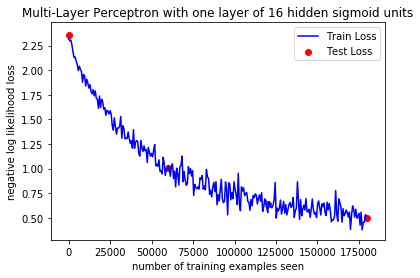

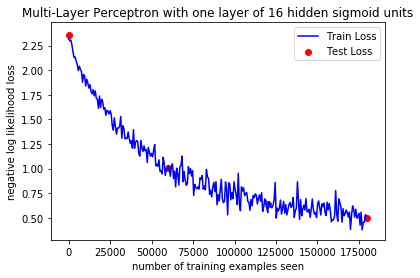

In [165]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Multi-Layer Perceptron with one layer of 16 hidden sigmoid units')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Let's make our 128 hidden sigmoid units

In [166]:
class ML_Perp_128(nn.Module):
    def __init__(self):
        super(ML_Perp_128, self).__init__()
        self.hidden = nn.Linear(28**2, 128, bias=True)
        self.output = nn.Linear(128,10)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = torch.sigmoid(self.hidden(x))
        x = self.output(x)
        return F.log_softmax(x)
    
ml_perp_128 = ML_Perp_128()
optimizer = optim.SGD(ml_perp_128.parameters(), lr=learning_rate, momentum=momentum)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train128(epoch):
  ml_perp_128.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = ml_perp_128(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test128():
  ml_perp_128.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = ml_perp_128(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [167]:
test128()
for epoch in range(1, n_epochs + 1):
  train128(epoch)
  test128()

/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':



Test set: Avg. loss: 2.3408, Accuracy: 999/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.324700
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.293817
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.222671
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.202193
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.136152
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.104080
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.034808
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.954375
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.938423
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.926006
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.847433
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.806610
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.787782
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.766609
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.640933
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.558910
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.527166
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.614400
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.460765
Train Epoch: 1 [12160/6

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.410146
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.270945
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.372541
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.520957
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.277044
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.291123
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.306237
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.645527
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.434080
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.446709
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.268334
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.253930
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.481433
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.497282
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.416045
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.392423
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.428787
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.409029
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.445264
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.457309


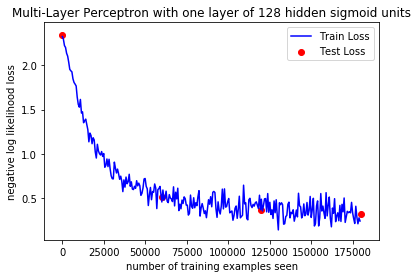

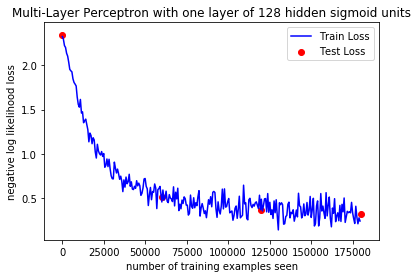

In [168]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Multi-Layer Perceptron with one layer of 128 hidden sigmoid units')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Let's make our 128 hidden ReLU units

In [169]:
class ML_Perp_128_ReLU(nn.Module):
    def __init__(self):
        super(ML_Perp_128_ReLU, self).__init__()
        self.hidden = nn.Linear(28**2, 128, bias=True)
        self.output = nn.Linear(128,10)
        self.ReLU = nn.ReLU()
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return F.log_softmax(x)
    
ml_perp_128_ReLU = ML_Perp_128_ReLU()
optimizer = optim.SGD(ml_perp_128_ReLU.parameters(), lr=learning_rate, momentum=momentum)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train128_ReLU(epoch):
  ml_perp_128_ReLU.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = ml_perp_128_ReLU(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test128_ReLU():
  ml_perp_128_ReLU.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = ml_perp_128_ReLU(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [170]:
test128_ReLU()
for epoch in range(1, n_epochs + 1):
  train128_ReLU(epoch)
  test128_ReLU()

/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':



Test set: Avg. loss: 2.3431, Accuracy: 782/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.321876
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.077037
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.610075
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.477838
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.312984
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.111952
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.874677
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.762427
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.878080
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.749793
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.717730
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.678314
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.617727
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.523220
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.456866
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.423112
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.421915
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.510844
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.484724
Train Epoch: 1 [12160/6

Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.245452
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.198789
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.268002
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.131823
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.177344
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.254564
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.219130
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.139130
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.373626
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.291197
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.220149
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.136770
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.138780
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.158996
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.283295
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.427471
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.232489
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.231875
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.216072
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.145630


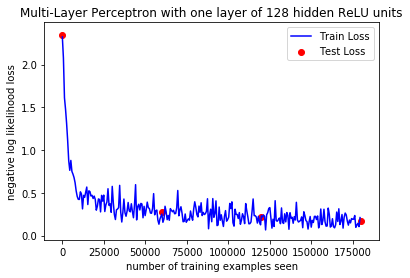

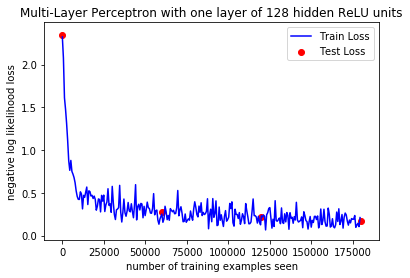

In [171]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Multi-Layer Perceptron with one layer of 128 hidden ReLU units')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Now let's do Convolutional Networks with 128 hidden ReLU units with 50% Dropout

In [172]:
class ML_Perp_128_ReLU_DO(nn.Module):
    def __init__(self):
        super(ML_Perp_128_ReLU_DO, self).__init__()
        self.hidden = nn.Linear(28**2, 128, bias=True)
        self.output = nn.Linear(128,10)
        self.output_drop = nn.Dropout(p=0.5)
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = F.relu(self.hidden(x))
        x = self.output_drop(self.output(x))
        return F.log_softmax(x)
    
ml_perp_128_ReLU_DO = ML_Perp_128_ReLU_DO()
optimizer = optim.SGD(ml_perp_128_ReLU_DO.parameters(), lr=learning_rate, momentum=momentum)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train128_ReLU_DO(epoch):
  ml_perp_128_ReLU_DO.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = ml_perp_128_ReLU_DO(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test128_ReLU_DO():
  ml_perp_128_ReLU_DO.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = ml_perp_128_ReLU_DO(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [173]:
test128_ReLU_DO()
for epoch in range(1, n_epochs + 1):
  train128_ReLU_DO(epoch)
  test128_ReLU_DO()

/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':



Test set: Avg. loss: 2.3260, Accuracy: 1288/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.295356
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.090605
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.942808
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.707928
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.866009
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.409104
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.608136
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.554744
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.298314
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.520731
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.384509
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.361588
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.235210
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.202049
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.323775
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.273810
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.426798
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.324462
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.308339
Train Epoch: 1 [12160

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.856067
Train Epoch: 2 [45440/60000 (76%)]	Loss: 1.084129
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.811983
Train Epoch: 2 [46720/60000 (78%)]	Loss: 1.095831
Train Epoch: 2 [47360/60000 (79%)]	Loss: 1.020253
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.967041
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.975703
Train Epoch: 2 [49280/60000 (82%)]	Loss: 1.161745
Train Epoch: 2 [49920/60000 (83%)]	Loss: 1.037980
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.853682
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.195847
Train Epoch: 2 [51840/60000 (86%)]	Loss: 1.065314
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.855097
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.917176
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.857081
Train Epoch: 2 [54400/60000 (91%)]	Loss: 1.028361
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.920280
Train Epoch: 2 [55680/60000 (93%)]	Loss: 1.020587
Train Epoch: 2 [56320/60000 (94%)]	Loss: 1.131164
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.993367


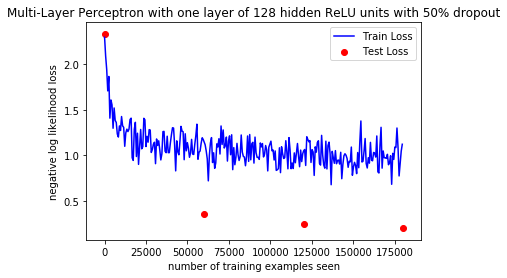

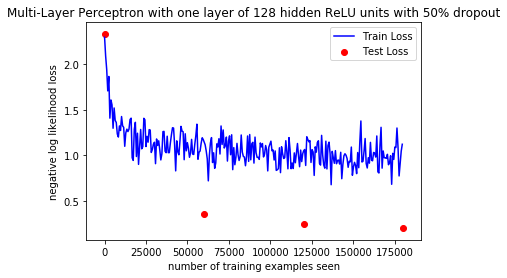

In [174]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Multi-Layer Perceptron with one layer of 128 hidden ReLU units with 50% dropout')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Now let's do a 2D Convolutional with 1 layer of 128 ReLU units and 50% dropout

In [175]:
class Conv_DO50(nn.Module):
    def __init__(self):
        super(Conv_DO50, self).__init__()
        self.conv = nn.Conv2d(1,1, kernel_size=5)
        self.fc1 = nn.Linear(24**2,128)
        self.fc2 = nn.Linear(128,10)
        self.fc_drop = nn.Dropout2d(p=0.5)
        
    def forward(self,x):
        x = F.relu(self.conv(x))
        x = x.view(-1,24**2)
        x = F.relu(self.fc1(x))
        x = self.fc_drop(x)
        x = self.fc2(x)
        return F.log_softmax(x)
    
conv_do50 = Conv_DO50()
optimizer = optim.SGD(conv_do50.parameters(), lr=learning_rate, momentum=momentum)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train_convdo50(epoch):
  conv_do50.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = conv_do50(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test_convdo50():
  conv_do50.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = conv_do50(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))    
    

In [176]:
test_convdo50()
for epoch in range(1, n_epochs + 1):
  train_convdo50(epoch)
  test_convdo50()
    

/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app



Test set: Avg. loss: 2.3226, Accuracy: 789/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304893
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.288645
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.303615
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.248290
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.241908
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.178917
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.876761
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.542060
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.279813
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.135868
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.061384
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.975123
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.810933
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.767898
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.600337
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.568914
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.590985
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.756875
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.885859
Train Epoch: 1 [12160/6

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.203940
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.242325
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.126511
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.363349
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.128712
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.211637
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.345366
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.212190
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.113630
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.127968
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.197754
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.414588
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.207696
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.296248
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.270204
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.331790
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.233596
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.346027
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.246726
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.182568


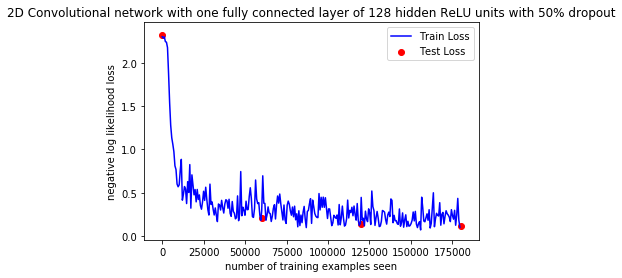

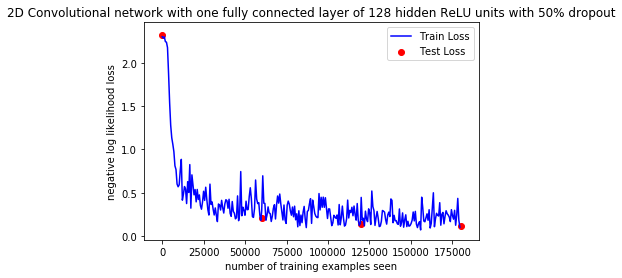

In [177]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('2D Convolutional network with one fully connected layer of 128 hidden ReLU units with 50% dropout')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# CNN, 1 max pool layer (25% do) with 128 hidden ReLU units with 50% Dropout

In [178]:
class Conv_MP25_DO50(nn.Module):
    def __init__(self):
        super(Conv_MP25_DO50, self).__init__()
        self.conv = nn.Conv2d(1,4, kernel_size=5)
        self.conv_drop = nn.Dropout2d(p=0.25)
        self.fc1 = nn.Linear(24**2,128)
        self.fc2 = nn.Linear(128,10)
        self.fc_drop = nn.Dropout2d(p=0.5)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv_drop(self.conv(x)),2))
        x = x.view(-1,24**2)
        x = F.relu(self.fc_drop(self.fc1(x)))
        x = self.fc2(x)
        return F.log_softmax(x)
    
conv_mp25_do50 = Conv_MP25_DO50()
optimizer = optim.SGD(conv_mp25_do50.parameters(), lr=learning_rate, momentum=momentum)
print(conv_mp25_do50)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train_convmp25do50(epoch):
  conv_mp25_do50.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = conv_mp25_do50(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test_convmp25do50():
  conv_mp25_do50.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = conv_mp25_do50(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))    

Conv_MP25_DO50(
  (conv): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv_drop): Dropout2d(p=0.25)
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (fc_drop): Dropout2d(p=0.5)
)


In [179]:
test_convmp25do50()
for epoch in range(1, n_epochs + 1):
  train_convmp25do50(epoch)
  test_convmp25do50()
    

/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app



Test set: Avg. loss: 2.3226, Accuracy: 974/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.392275
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.180928
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.917840
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.726186
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.481323
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.455977
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.264283
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.100188
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.177211
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.710636
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.919985
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.806125
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.806242
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.964305
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.788012
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.727555
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.911461
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.781560
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.646013
Train Epoch: 1 [12160/6

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.338012
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.216767
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.214599
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.087107
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.296696
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.455082
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.278904
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.329946
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.455759
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.400183
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.116567
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.304643
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.155600
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.264719
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.283042
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.305922
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.293231
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.218432
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.197250
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.262565


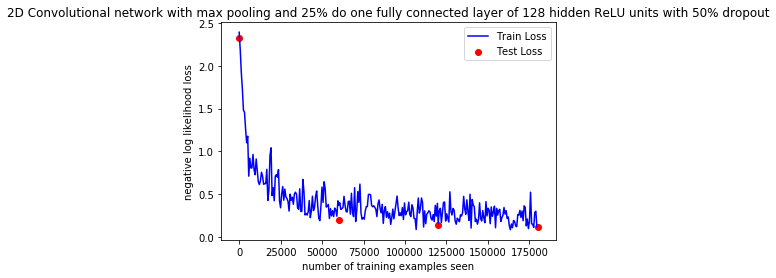

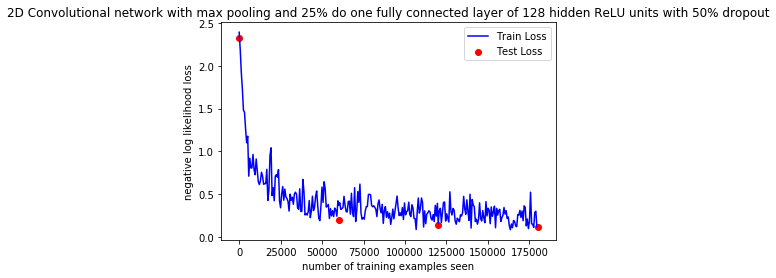

In [180]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('2D Convolutional network with max pooling and 25% do one fully connected layer of 128 hidden ReLU units with 50% dropout')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# 2 CNN, 1 max pool layer (25% do) with 128 hidden ReLU units with 50% Dropout

In [181]:
class Conv2_MP25_DO50(nn.Module):
    def __init__(self):
        super(Conv2_MP25_DO50, self).__init__()
        self.conv1 = nn.Conv2d(1,4, kernel_size=5)
        self.conv2 = nn.Conv2d(4,5, kernel_size=5)
        self.conv_drop = nn.Dropout2d(p=0.25)
        self.fc1 = nn.Linear(320,128)
        self.fc_drop = nn.Dropout2d(p=0.5)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv_drop(self.conv1(x)),2))
        x = F.relu(self.conv2(x))
        x = x.view(-1,320)
        x = F.relu(self.fc_drop(self.fc1(x)))
        x = self.fc2(x)
        return F.log_softmax(x)
    
conv2_mp25_do50 = Conv2_MP25_DO50()
optimizer = optim.SGD(conv2_mp25_do50.parameters(), lr=learning_rate, momentum=momentum)
print(conv2_mp25_do50)

# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train_conv2mp25do50(epoch):
  conv2_mp25_do50.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = conv2_mp25_do50(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test_conv2mp25do50():
  conv2_mp25_do50.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = conv2_mp25_do50(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))    

Conv2_MP25_DO50(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 5, kernel_size=(5, 5), stride=(1, 1))
  (conv_drop): Dropout2d(p=0.25)
  (fc1): Linear(in_features=320, out_features=128, bias=True)
  (fc_drop): Dropout2d(p=0.5)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [182]:
test_conv2mp25do50()
for epoch in range(1, n_epochs + 1):
  train_conv2mp25do50(epoch)
  test_conv2mp25do50()

/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.2997, Accuracy: 968/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298404
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.313461
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.288760
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.300102
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.273283
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.288485
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.264829
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.263948
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.252531
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.235257
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.184809
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.068660
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.946484
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.886300
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.672594
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.446016
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.315927
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.171325
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.270428
Train Epoch: 1 [12160/6

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.293261
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.266083
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.315267
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.287668
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.265387
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.225928
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.255603
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.275885
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.262149
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.143781
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.211242
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.337145
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.313421
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.113016
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.323959
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.368893
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.183652
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.171273
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.365368
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.183613


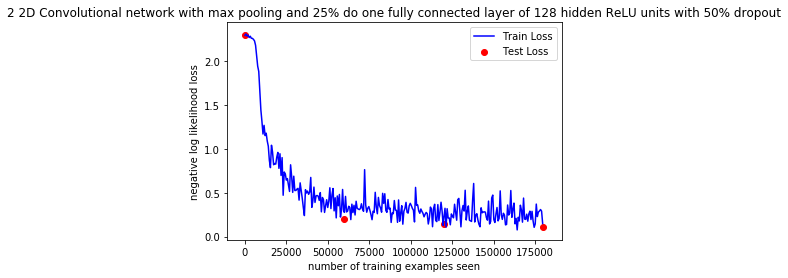

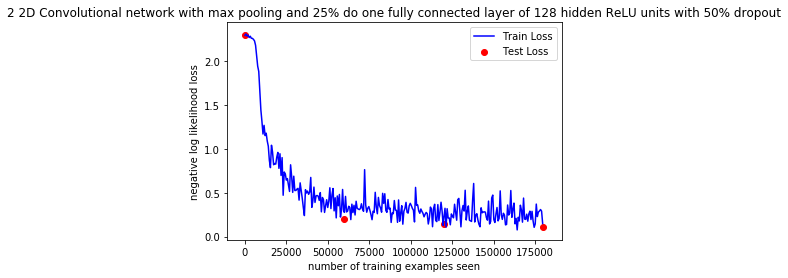

In [183]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('2 2D Convolutional network with max pooling and 25% do one fully connected layer of 128 hidden ReLU units with 50% dropout')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# I was reading a friend's paper which was about dropout. So I wanted to see how these networks perform with dropout in different areas

# 2 CNN, 1 max pool layer (25% do) with 128 hidden ReLU units with 50% Dropout after FC

In [184]:
class Conv2_MP25_DO50(nn.Module):
    def __init__(self):
        super(Conv2_MP25_DO50, self).__init__()
        self.conv1 = nn.Conv2d(1,4, kernel_size=5)
        self.conv2 = nn.Conv2d(4,5, kernel_size=5)
        self.conv_drop = nn.Dropout2d(p=0.25)
        self.fc1 = nn.Linear(320,128)
        self.fc_drop = nn.Dropout2d(p=0.5)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv_drop(self.conv1(x)),2))
        x = F.relu(self.conv2(x))
        x = x.view(-1,320)
        #x = F.relu(self.fc_drop(self.fc(x)))
        x = F.relu(self.fc1(x))
        x = self.fc_drop(x)
        x = self.fc2(x)
        return F.log_softmax(x)
    
conv2_mp25_do50 = Conv2_MP25_DO50()
optimizer = optim.SGD(conv2_mp25_do50.parameters(), lr=learning_rate, momentum=momentum)
print(conv2_mp25_do50)

# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train_conv2mp25do50(epoch):
  conv2_mp25_do50.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = conv2_mp25_do50(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test_conv2mp25do50():
  conv2_mp25_do50.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = conv2_mp25_do50(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))  
test_conv2mp25do50()
for epoch in range(1, n_epochs + 1):
  train_conv2mp25do50(epoch)
  test_conv2mp25do50()

Conv2_MP25_DO50(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 5, kernel_size=(5, 5), stride=(1, 1))
  (conv_drop): Dropout2d(p=0.25)
  (fc1): Linear(in_features=320, out_features=128, bias=True)
  (fc_drop): Dropout2d(p=0.5)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.3115, Accuracy: 1000/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.330239
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.304119
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.307333
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.280623
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.276067
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.209675
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.182152
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.848688
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.679393
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.565173
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.358562
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.194503
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.131972
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.842317
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.986472
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.951938
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.951387
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.772007
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.789898
Train Epoch: 1 [12160

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.251408
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.293851
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.181236
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.455351
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.303318
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.196599
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.242866
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.414166
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.156776
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.102341
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.211109
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.230456
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.376861
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.346398
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.328271
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.417372
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.267781
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.200545
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.240154
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.261719


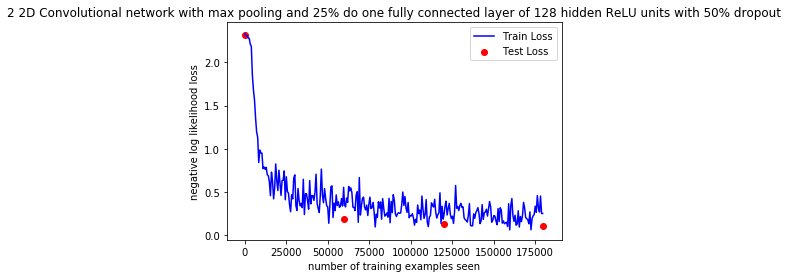

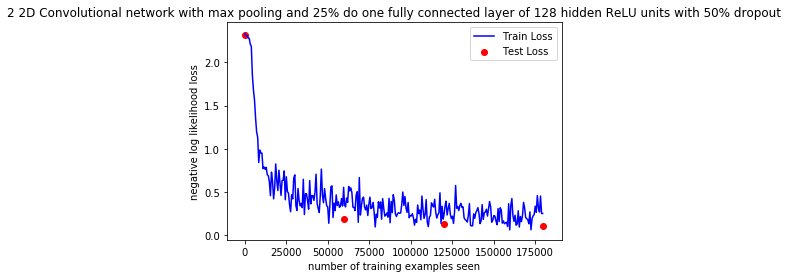

In [185]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('2 2D Convolutional network with max pooling and 25% do one fully connected layer of 128 hidden ReLU units with 50% dropout')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# This still doesn't look quite right. So let's remove dropout all together

In [186]:
class Conv2_MP25(nn.Module):
    def __init__(self):
        super(Conv2_MP25, self).__init__()
        self.conv1 = nn.Conv2d(1,4, kernel_size=5)
        self.conv2 = nn.Conv2d(4,5, kernel_size=5)
        self.fc1 = nn.Linear(320,128)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(self.conv2(x))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
    
conv2_mp25 = Conv2_MP25()
optimizer = optim.SGD(conv2_mp25.parameters(), lr=learning_rate, momentum=momentum)
print(conv2_mp25)

# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train_conv2mp25(epoch):
  conv2_mp25.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = conv2_mp25(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test_conv2mp25():
  conv2_mp25_do50.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = conv2_mp25(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))  

test_conv2mp25()
for epoch in range(1, n_epochs + 1):
  train_conv2mp25(epoch)
  test_conv2mp25()
    


Conv2_MP25(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 5, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app



Test set: Avg. loss: 2.3184, Accuracy: 521/10000 (5%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.339804
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.263120
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.257156
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.180612
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.090646
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.881420
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.439983
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.051883
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.976573
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.682503
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.604107
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.484465
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.483835
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.460385
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.472006
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.764413
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.550016
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.422966
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.259197
Train Epoch: 1 [12160/6

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.093172
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.151573
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.071503
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.242506
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.146319
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.039935
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.102462
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.062185
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.150605
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.055110
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.095170
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.095950
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.127250
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.101819
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.114024
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.023249
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.039909
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.096403
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.195138
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.069237


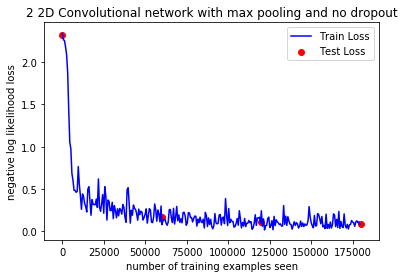

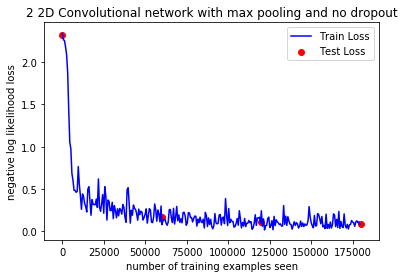

In [187]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('2 2D Convolutional network with max pooling and no dropout')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig